# Import Libraries

In [ ]:
#General
import numpy as np
import pandas as pd
import itertools

# System
import os, fnmatch
import time

# Visualization
import seaborn #visualization library, must be imported before all other plotting libraries
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
from IPython.core.display import HTML, display

# Machine Learning
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
!pip install -q umap-learn
import umap.umap_ as umap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Random Seed
from numpy.random import seed
seed(1)

# Audio
import librosa.display, librosa

     |████████████████████████████████| 88 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 36.5 MB/s 


In [ ]:
# Root Directory of project
root = "/content/drive/MyDrive/ML_Final_Project"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Features

In [ ]:
features = pd.read_csv(f'{root}/Features/CHROMA.csv', index_col=0)
features

,voice_id,emotion_id,text_id,gender,age,0,1,2,3,4,5,6,7,8,9,10,11
0,15997,1,1,1,21,0.426531,0.627456,0.715029,0.576581,0.453580,0.508431,0.565955,0.443822,0.354638,0.374649,0.481286,0.409486
1,16001,1,2,1,21,0.392987,0.492505,0.623612,0.571851,0.530887,0.446077,0.569913,0.626373,0.469187,0.392157,0.418075,0.437141
2,16005,1,3,1,21,0.439335,0.463870,0.499159,0.587726,0.569777,0.570952,0.561026,0.477783,0.400652,0.482091,0.578783,0.516583
3,16009,1,4,1,21,0.488461,0.534350,0.568310,0.618840,0.627356,0.547109,0.484552,0.469280,0.454420,0.483986,0.500889,0.493628
4,16013,1,5,1,21,0.426701,0.461568,0.471308,0.406656,0.427444,0.560524,0.559650,0.541751,0.435585,0.407551,0.457566,0.500756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16435,10563,4,6,0,54,0.514507,0.497877,0.618810,0.677894,0.579274,0.525870,0.509975,0.536056,0.532481,0.397533,0.413176,0.451733
16436,10567,4,7,0,54,0.473864,0.431175,0.438327,0.445875,0.563599,0.611575,0.639518,0.640928,0.585951,0.545249,0.571068,0.587005
16437,10571,4,8,0,54,0.312178,0.334281,0.432933,0.488637,0.530956,0.562069,0.462637,0.419495,0.376633,0.356017,0.378899,0.362653
16438,10575,4,9,0,54,0.476043,0.490196,0.475176,0.446081,0.553767,0.599893,0.576215,0.561223,0.473401,0.462722,0.483837,0.470839


In [ ]:
X = features.drop(['emotion_id', 'voice_id', 'text_id'], 1)
X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,gender,age,0,1,2,3,4,5,6,7,8,9,10,11
0,1,21,0.426531,0.627456,0.715029,0.576581,0.453580,0.508431,0.565955,0.443822,0.354638,0.374649,0.481286,0.409486
1,1,21,0.392987,0.492505,0.623612,0.571851,0.530887,0.446077,0.569913,0.626373,0.469187,0.392157,0.418075,0.437141
2,1,21,0.439335,0.463870,0.499159,0.587726,0.569777,0.570952,0.561026,0.477783,0.400652,0.482091,0.578783,0.516583
3,1,21,0.488461,0.534350,0.568310,0.618840,0.627356,0.547109,0.484552,0.469280,0.454420,0.483986,0.500889,0.493628
4,1,21,0.426701,0.461568,0.471308,0.406656,0.427444,0.560524,0.559650,0.541751,0.435585,0.407551,0.457566,0.500756


In [ ]:
y = features['emotion_id']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: emotion_id, dtype: int64

# Function To Plot Data

In [ ]:
def plot_dimensions_reductioned_data(ax, df):

    df_angry = []
    df_sad = []
    df_happy = []
    df_neutral = []

    
    for i,n in enumerate(df):

        if y[i]==1: df_angry.append(n)
        elif y[i]==2: df_sad.append(n)
        elif y[i]==3:df_happy.append(n)
        elif y[i]==4:df_neutral.append(n)

    df_angry = np.array(df_angry)
    df_sad =  np.array(df_sad)
    df_happy =  np.array(df_happy)
    df_neutral =  np.array(df_neutral)

    ax.scatter(df_angry[:,0] , df_angry[:,1] , label = 'angry',color="r")
    ax.scatter(df_sad[:,0] , df_sad[:,1] , label = 'sad',color="b")
    ax.scatter(df_happy[:,0] , df_happy[:,1] , label = 'happy',color="g")
    ax.scatter(df_neutral[:,0] , df_neutral[:,1] , label = 'neutral',color="k")

    
    ax.set_title('Orginal data', fontsize=20)

    ax.legend()

# Dimension Reduction

## tSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


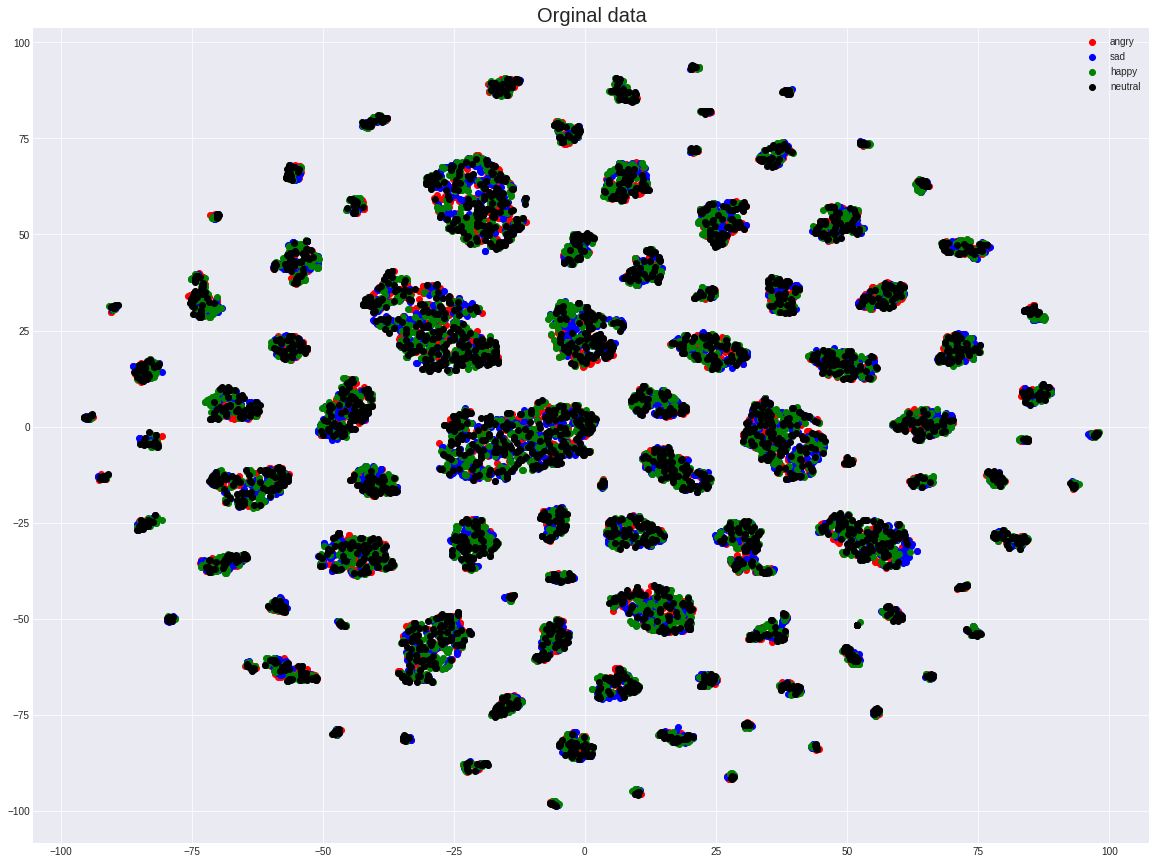

In [ ]:
tSNE=TSNE(n_components=2)
df=tSNE.fit_transform(X)
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
plot_dimensions_reductioned_data(ax, df)

## PCA

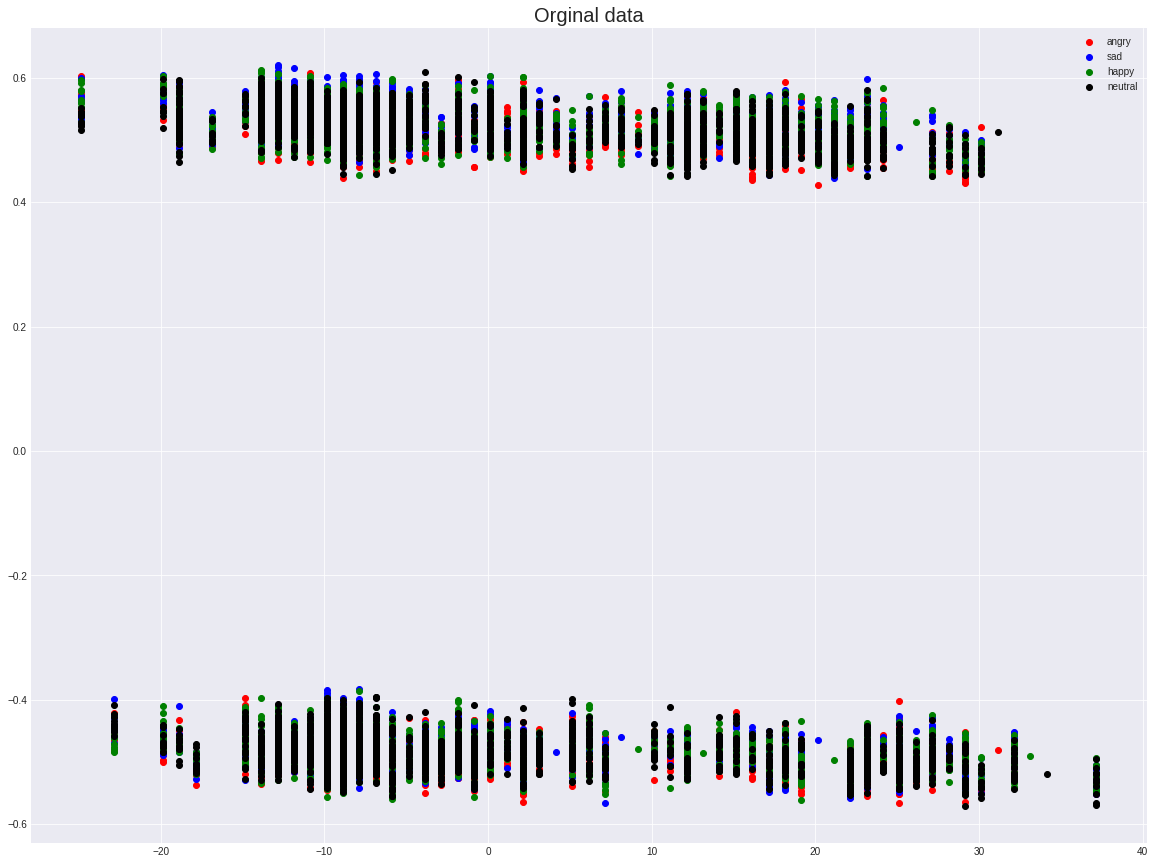

In [ ]:
pca = PCA(2)
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
plot_dimensions_reductioned_data(ax, pca.fit_transform(X))

## UMAP

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(16440, 2)


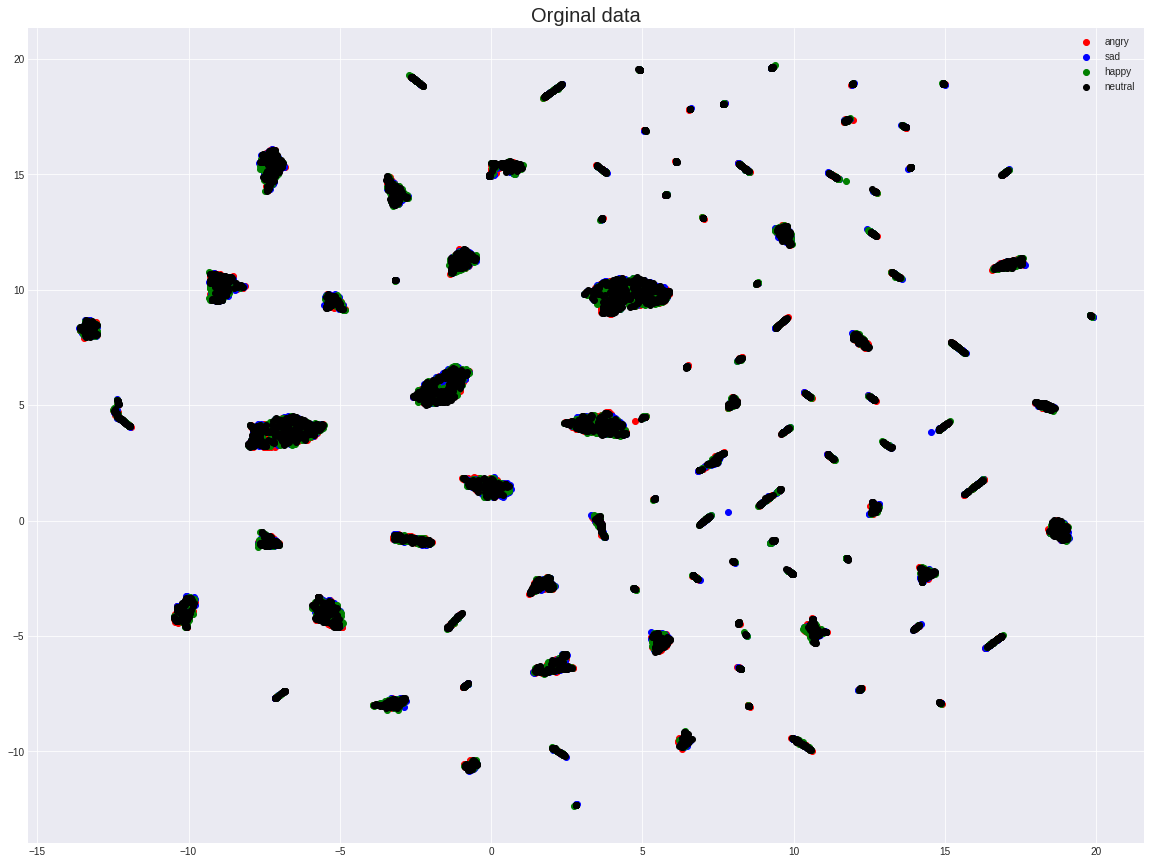

In [ ]:
reducer = umap.UMAP()
df = reducer.fit_transform(X)
print(df.shape)
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
plot_dimensions_reductioned_data(ax, df)

## LDA

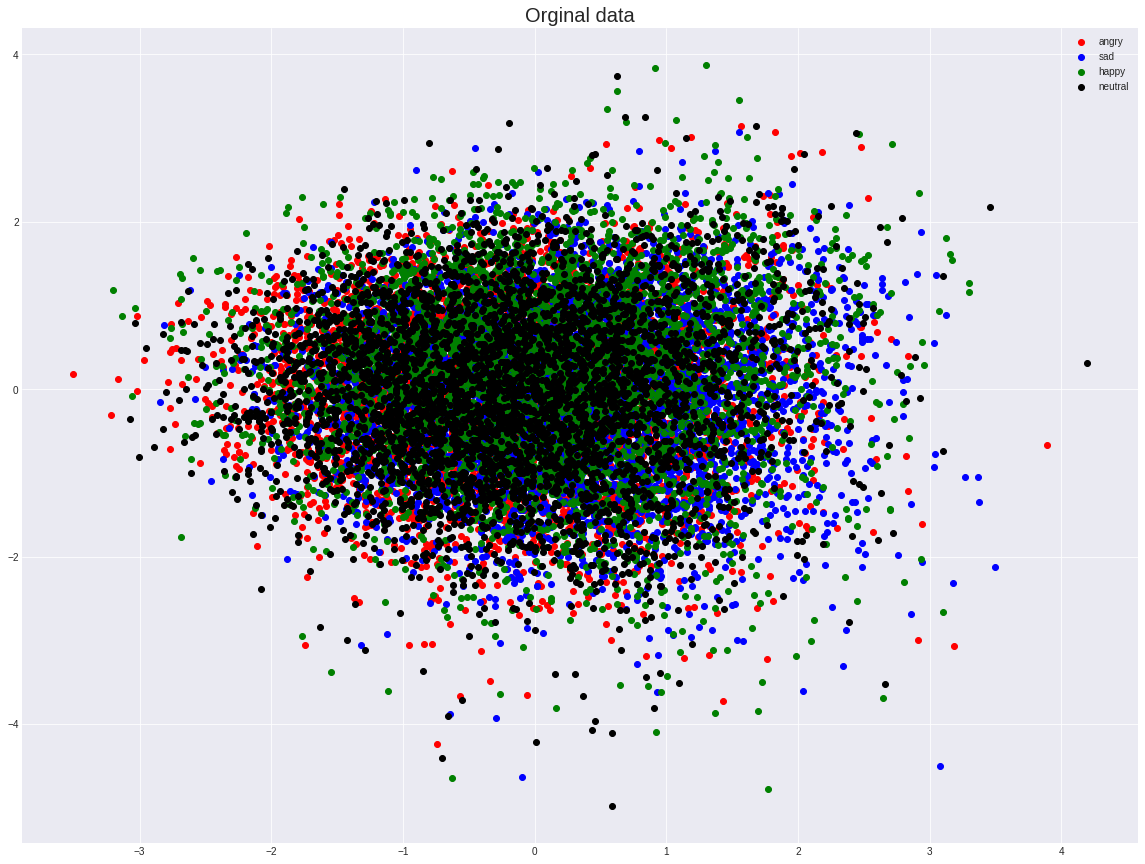

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
df = lda.fit(X, y).transform(X)
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
plot_dimensions_reductioned_data(ax, df)

# Function for Kmean Clustering

In [ ]:
def kmean_clusters(ax, data,n_clusters):
    #Initialize the class object
    kmeans = KMeans(n_clusters= n_clusters)
    #predict the labels of clusters.
    # kmeans.fit_predict method returns the array of cluster labels each data point belongs to.
    classes = kmeans.fit_predict(data) 
    #print('clustring labels = ',classes)
    
    #Getting the Centroids
    centroids = kmeans.cluster_centers_
    u_labels = np.unique(classes)

    #plotting the results:
  
    #ax.figure.set_size_inches(16, 8)
    for i in u_labels:
        ax.scatter(data[classes == i , 0] , data[classes == i , 1] , label = i)
    ax.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    ax.legend()
    ax.set_title("K-Means clustring", fontsize=20)

## Function for Agglomerative Clustering

In [ ]:
def Agglomerative_clusters(ax, data,n_clusters):
    #Creating the model
    #linkage = 'complete' -> ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'complete')
    
    #predict the labels of clusters.
    #fit_predict method returns the array of cluster labels each data point belongs to.
    classes = agg_clustering.fit_predict(df)
   
    #print('clustring labels = ',classes)
    
    #Getting the Centroids
    from sklearn.neighbors import NearestCentroid
    clf = NearestCentroid()
    clf.fit(df, classes)
    centroids = clf.centroids_
    u_labels = np.unique(classes)

    #plotting the results:
    #ax.figure.set_size_inches(16, 8)
    for i in u_labels:
        ax.scatter(data[classes == i , 0] , data[classes == i , 1] , label = i)
    ax.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    ax.legend()
    ax.set_title("Agglomerative clustring", fontsize=20)

# Plot Clusterings

In [ ]:
def plot_clustering(data,n_clusters):
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,8))
    fig.subplots_adjust(wspace=.1)
    Agglomerative_clusters(ax1,data,n_clusters)
    plot_dimensions_reductioned_data(ax2,df)
    kmean_clusters(ax3,data,n_clusters)

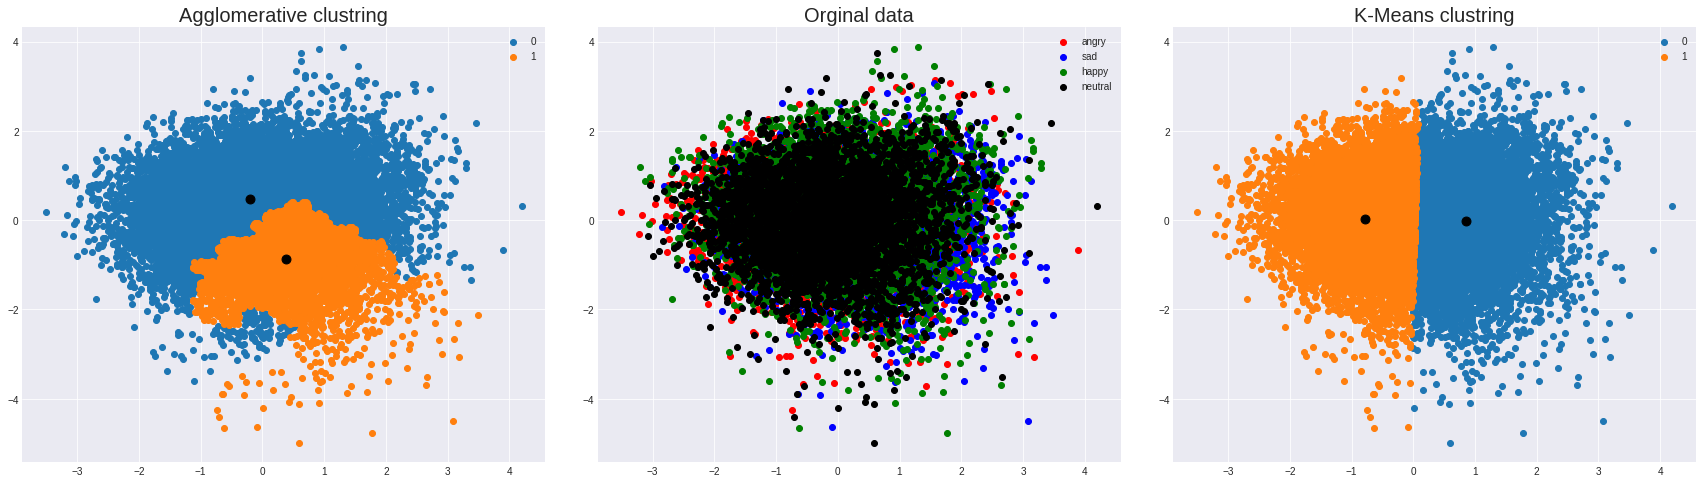

In [ ]:
plot_clustering(df,2)

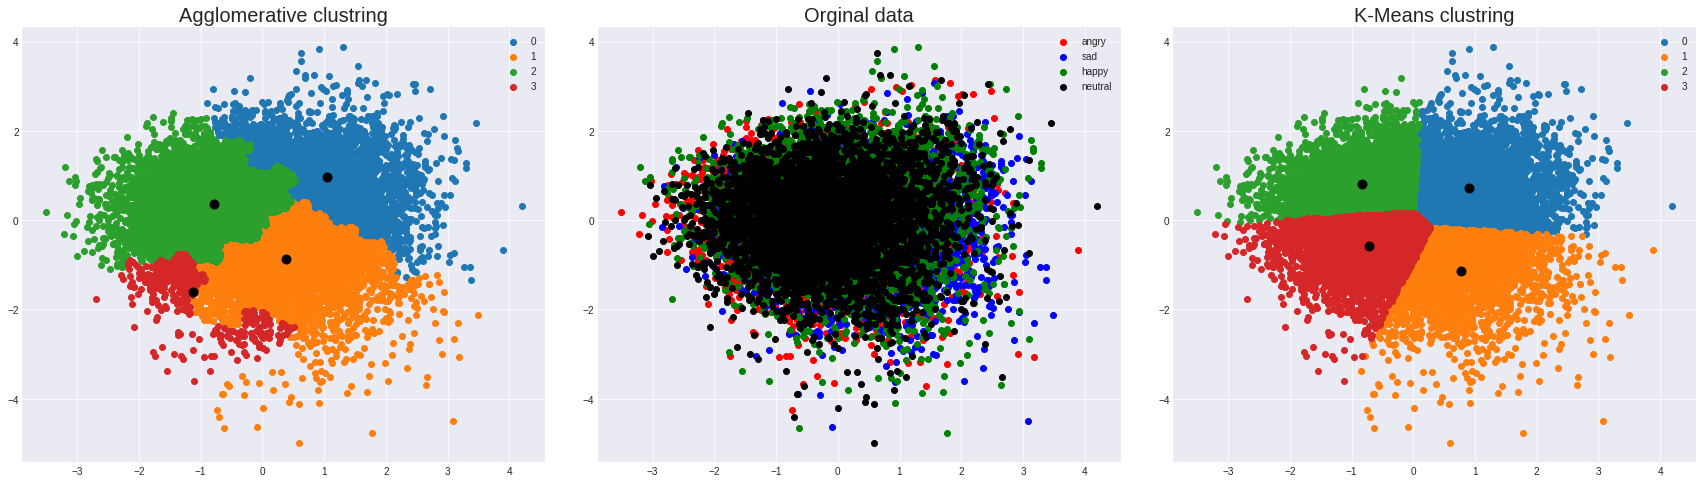

In [ ]:
plot_clustering(df,4)

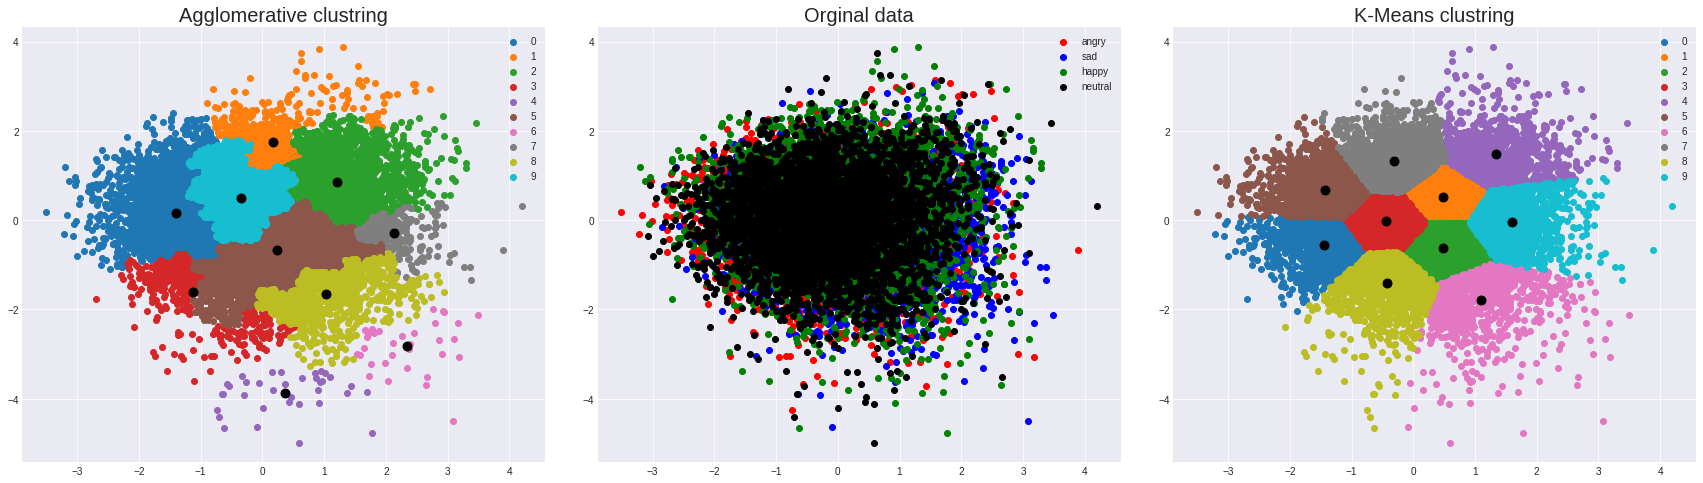

In [ ]:
plot_clustering(df,10)

# Clustering on Original Data

 33%|███▎      | 1/3 [00:03<00:06,  3.31s/it]



KMeans for 2 Clusters

Homogenity Score: 1.3660527718940488e-06

Silhouette Score: 0.7325530189936851


 67%|██████▋   | 2/3 [00:06<00:03,  3.26s/it]



KMeans for 4 Clusters

Homogenity Score: 5.169228993678775e-06

Silhouette Score: 0.5943978778780422


100%|██████████| 3/3 [00:09<00:00,  3.26s/it]



KMeans for 10 Clusters

Homogenity Score: 3.632668619125315e-05

Silhouette Score: 0.5229283888081641


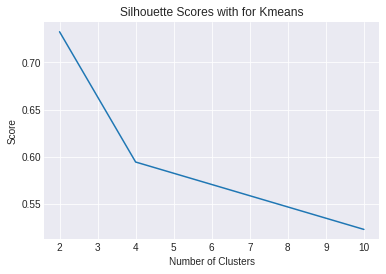

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.metrics.cluster import homogeneity_score

n_clusters=[2,4,10]
sc_scores = []
hm_scores = []

for n in tqdm(n_clusters):
    km = KMeans(n_clusters=n)
    km.fit_predict(X)
    sc_score = silhouette_score(X, km.labels_, metric='euclidean')
    hm_score = homogeneity_score(y, km.labels_)
    print(f'\n\nKMeans for {n} Clusters')
    print('\nHomogenity Score:', hm_score)
    print('\nSilhouette Score:', sc_score)
    print('================================')
    sc_scores.append(sc_score)
    hm_scores.append(hm_score)

plt.title(f'Homogenity Scores with for Kmeans')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.plot(n_clusters, hm_scores)
plt.show()
    
plt.title(f'Silhouette Scores with for Kmeans')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.plot(n_clusters, sc_scores)
plt.show()

 33%|███▎      | 1/3 [00:18<00:36, 18.15s/it]



AgglomerativeClustering for 2 Clusters

Homogenity Score: 4.483237675687653e-06

Silhouette Score: 0.7046179859970164


 67%|██████▋   | 2/3 [00:34<00:16, 16.89s/it]



AgglomerativeClustering for 4 Clusters

Homogenity Score: 7.082423258958916e-06

Silhouette Score: 0.5009067677148876


100%|██████████| 3/3 [00:49<00:00, 16.40s/it]



AgglomerativeClustering for 10 Clusters

Homogenity Score: 3.076410975144023e-05

Silhouette Score: 0.43588945837590976


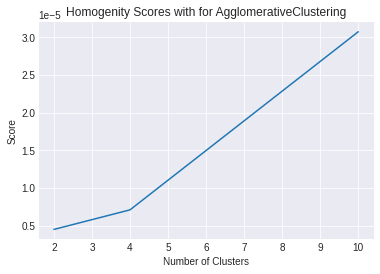

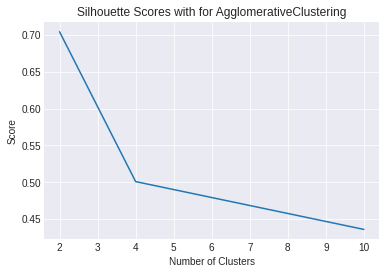

In [ ]:
from sklearn.cluster import AgglomerativeClustering

n_clusters=[2,4,10]
sc_scores = []
hm_scores = []

for n in tqdm(n_clusters):
    cl = AgglomerativeClustering(n_clusters=n, affinity = 'euclidean', linkage = 'complete')
    cl.fit_predict(X)
    sc_score = silhouette_score(X, cl.labels_, metric='euclidean')
    hm_score = homogeneity_score(y, cl.labels_)
    print(f'\n\nAgglomerativeClustering for {n} Clusters')
    print('\nHomogenity Score:', hm_score)
    print('\nSilhouette Score:', sc_score)
    print('================================')
    sc_scores.append(sc_score)
    hm_scores.append(hm_score)

    
plt.title(f'Homogenity Scores with for AgglomerativeClustering')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.plot(n_clusters, hm_scores)
plt.show()
    
plt.title(f'Silhouette Scores with for AgglomerativeClustering')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.plot(n_clusters, sc_scores)
plt.show()